# Importing the necessary libraries

In [1]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from bioinfokit.visuz import cluster
from yellowbrick.cluster import KElbowVisualizer

<IPython.core.display.Javascript object>

In [2]:
dataset_url = "https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv"
df = pd.read_csv(dataset_url)

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


# Visualization Of Categorical and Continuous Variable

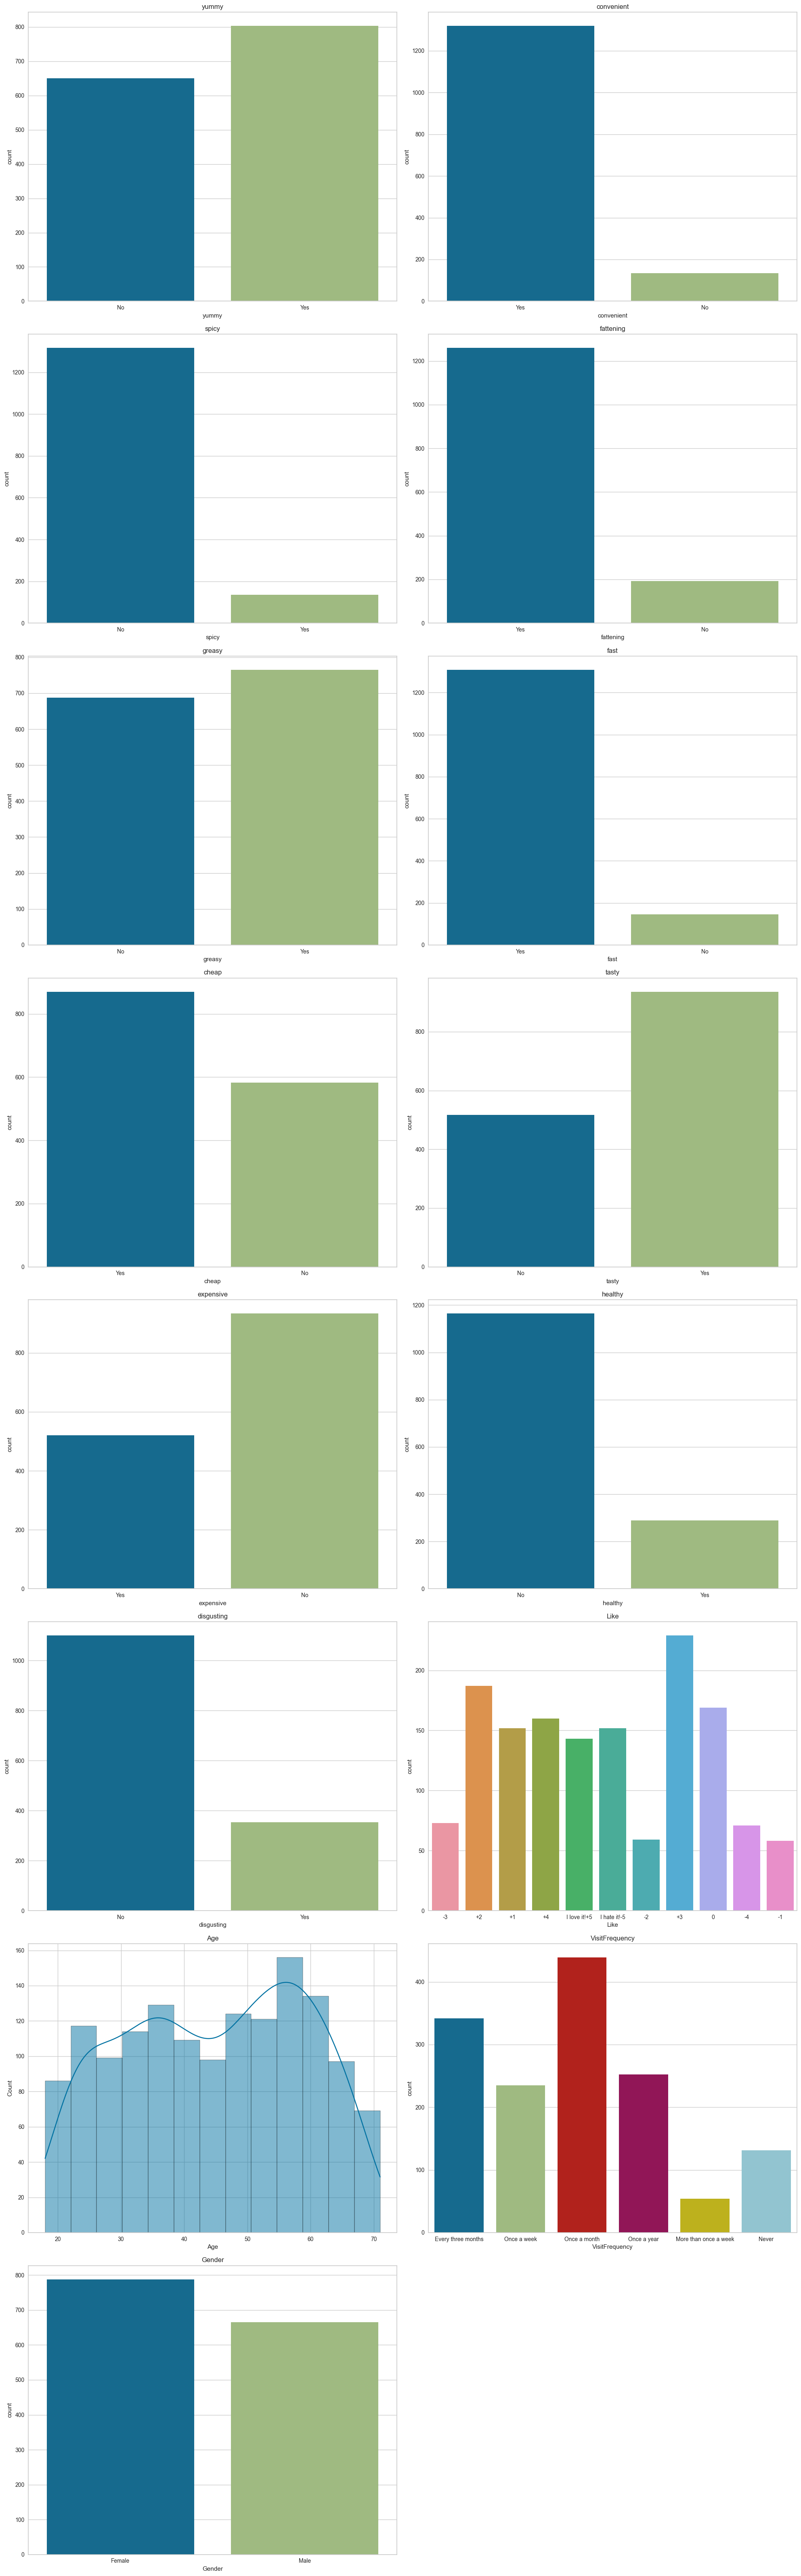

In [6]:
num_cols = df.shape[1]

num_rows = (num_cols + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 8 * num_rows))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    
    if df[col].dtype == "object":
        # Categorical variable
        sns.countplot(data=df, x=col, ax=ax)
    else:
        # Continuous variable
        sns.histplot(data=df, x=col, ax=ax, kde=True)

    ax.set_title(col)

if num_cols % 2 == 1:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Gender Distribution

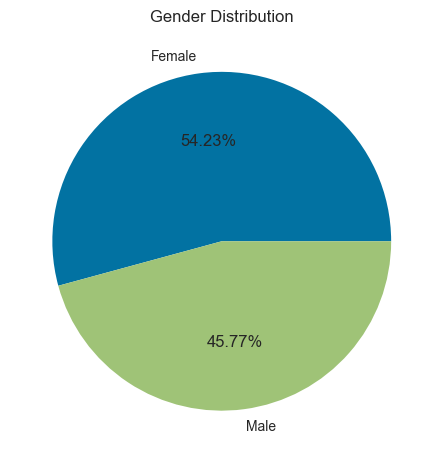

In [7]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts,labels=gender_counts.index,autopct='%.2f%%')
plt.title('Gender Distribution')
plt.show()

# Age Distribution

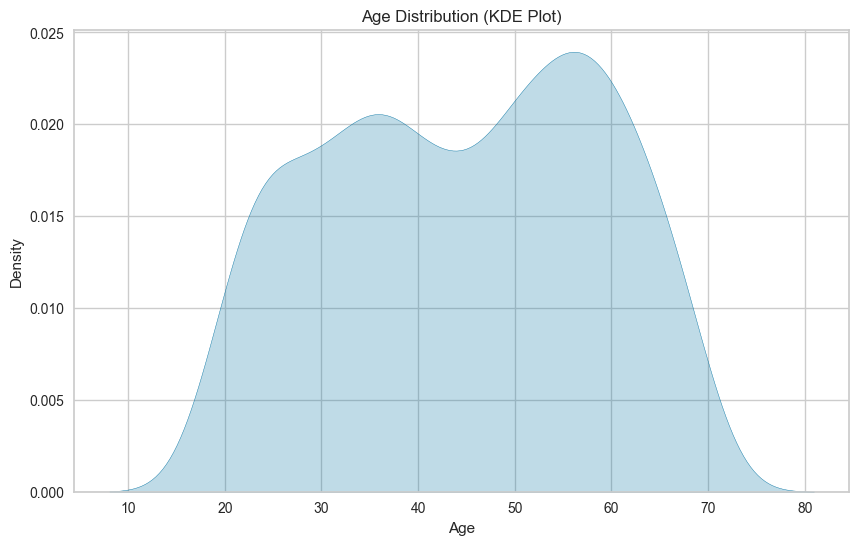

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Age", fill=True)
plt.title("Age Distribution (KDE Plot)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# Data Preprocessing

In [9]:
data = df.drop(['Like','Age','VisitFrequency','Gender'],axis=1)
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


# Ordinal Encoder

In [10]:
encoder = OrdinalEncoder()

data_encoded = encoder.fit_transform(data)

data_encoded_df = pd.DataFrame(data_encoded, columns=data.columns)


In [11]:
data_encoded_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


# PCA 

In [12]:
n_components = 11
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data_encoded_df)
column_names = [f"p{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(data=pca_result, columns=column_names)


In [13]:
pca_df.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [14]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p1      1453 non-null   float64
 1   p2      1453 non-null   float64
 2   p3      1453 non-null   float64
 3   p4      1453 non-null   float64
 4   p5      1453 non-null   float64
 5   p6      1453 non-null   float64
 6   p7      1453 non-null   float64
 7   p8      1453 non-null   float64
 8   p9      1453 non-null   float64
 9   p10     1453 non-null   float64
 10  p11     1453 non-null   float64
dtypes: float64(11)
memory usage: 125.0 KB


In [15]:
pca_df.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,-1.711562e-17,-5.807085e-17,2.750725e-17,3.851014e-17,1.100290e-17,-3.331433e-17,3.025797e-17,-1.222544e-18,-4.737359e-18,4.829050e-17,7.029630e-18
std,7.570495e-01,6.074556e-01,5.046195e-01,3.987986e-01,3.374050e-01,3.102746e-01,2.896973e-01,2.751220e-01,2.652511e-01,2.488418e-01,2.369028e-01
min,-1.188421e+00,-1.040274e+00,-8.808133e-01,-5.906209e-01,-1.045938e+00,-8.524911e-01,-8.059463e-01,-9.316201e-01,-9.557606e-01,-8.871971e-01,-8.851439e-01
25%,-5.476794e-01,-3.568482e-01,-4.507793e-01,-2.814986e-01,-2.433247e-01,-1.927027e-01,-1.342190e-01,-1.717258e-01,-1.181233e-01,-1.465751e-01,-1.053163e-01
50%,-7.074592e-02,-1.151632e-01,2.687734e-02,-1.163200e-01,3.348785e-02,-3.460184e-02,-6.366220e-02,-3.475619e-02,3.868061e-02,3.020635e-02,-1.201409e-02
75%,4.933012e-01,3.915540e-01,3.515939e-01,2.702298e-01,2.048293e-01,1.747453e-01,2.318357e-02,1.295966e-01,7.987794e-02,7.001416e-02,8.554080e-02
max,1.705573e+00,1.279130e+00,1.326976e+00,1.355278e+00,1.053327e+00,1.323793e+00,1.350886e+00,1.121388e+00,1.086693e+00,1.181524e+00,9.255829e-01


In [16]:
X = pca.components_
num_pc = pca.n_features_
pc_list = [f"p{i+1}" for i in range(num_pc)]
loading_df = pd.DataFrame(X.T, columns=pc_list, index=data_encoded_df.columns)


c:\Users\yeagr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
loading_df

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


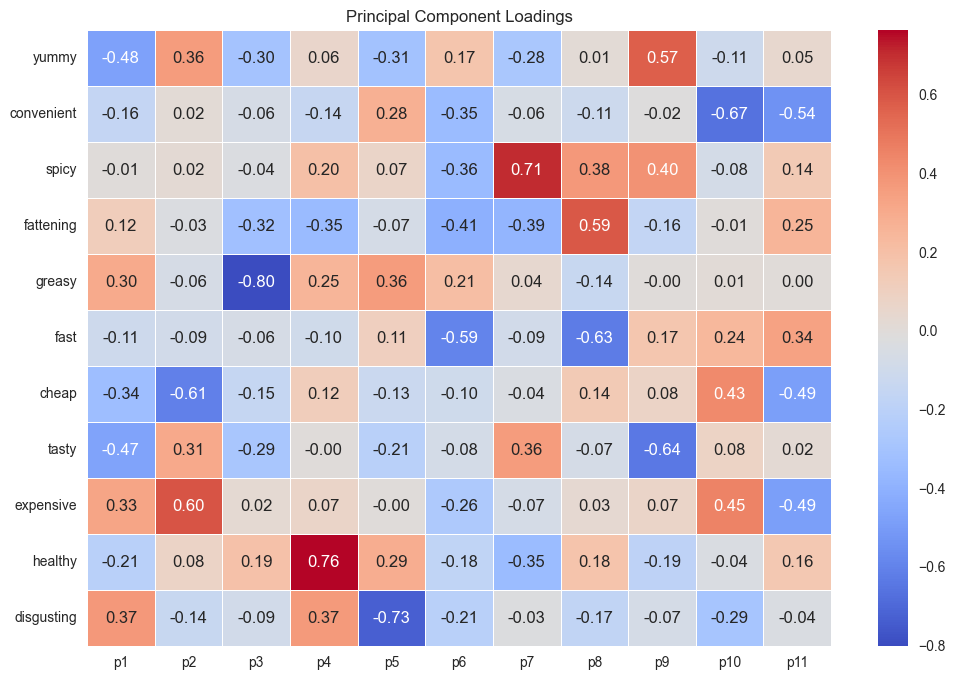

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(loading_df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Principal Component Loadings")
plt.show()

In [19]:
pca_1 = PCA().fit_transform(data_encoded_df)
pca_1

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

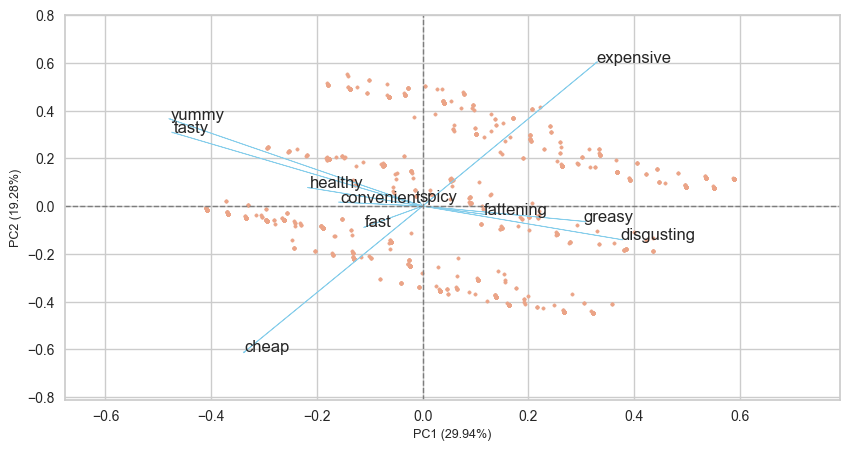

In [20]:
cluster.biplot(cscore=pca_1,
               loadings=X,
               labels=df.columns.values,
               var1 = round(pca.explained_variance_ratio_[0]*100,2),
               var2 = round(pca.explained_variance_ratio_[1]*100,2),
               show=True,
               dim=(10,5))

# K-means Clustering Algorithm


In [21]:
Kmeans = KMeans(n_clusters=4,random_state=42)
Kmeans.fit(data_encoded_df)

c:\Users\yeagr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [22]:
df['Cluster_name'] = Kmeans.labels_

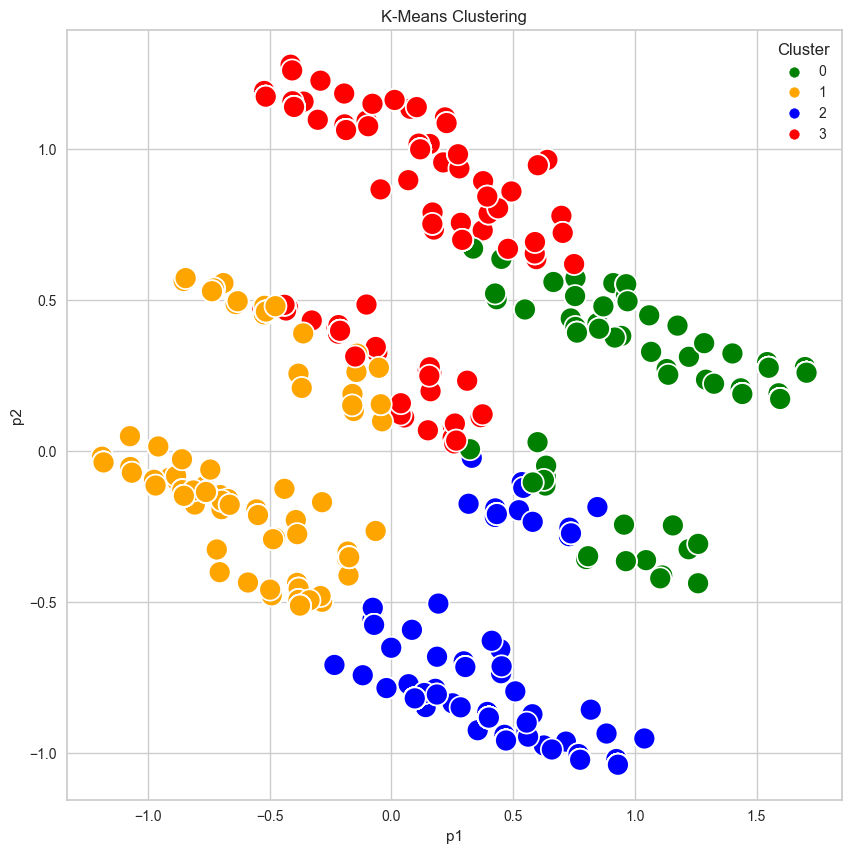

In [23]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=pca_df["p1"], y=pca_df["p2"], hue=Kmeans.labels_, s=250, palette=['green', 'orange', 'blue', 'red'])
plt.legend(title='Cluster')
plt.title("K-Means Clustering")
plt.show()

# Describing Segments For LIKE

In [24]:
df['Like'] = df['Like'].apply(lambda x: x.replace('I hate it!-5', '-5').replace('I love it!+5', '+5'))

In [25]:
crosstab = pd.crosstab(df["Cluster_name"], df["Like"])

In [26]:
crosstab

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
Cluster_name,,,,,,,,,,,
0,13,6,8,0,0,12,18,30,27,89,37
1,65,90,143,111,99,13,6,2,4,4,43
2,32,31,12,2,0,26,29,34,36,54,53
3,42,60,66,47,44,7,6,7,4,5,36


In [27]:
crosstab = crosstab[["-5", "-4", "-3", "-2", "-1", "+1", "+2", "+3", "+4", "+5"]]
crosstab



Like,-5,-4,-3,-2,-1,+1,+2,+3,+4,+5
Cluster_name,,,,,,,,,,
0,89,27,30,18,12,13,6,8,0,0
1,4,4,2,6,13,65,90,143,111,99
2,54,36,34,29,26,32,31,12,2,0
3,5,4,7,6,7,42,60,66,47,44


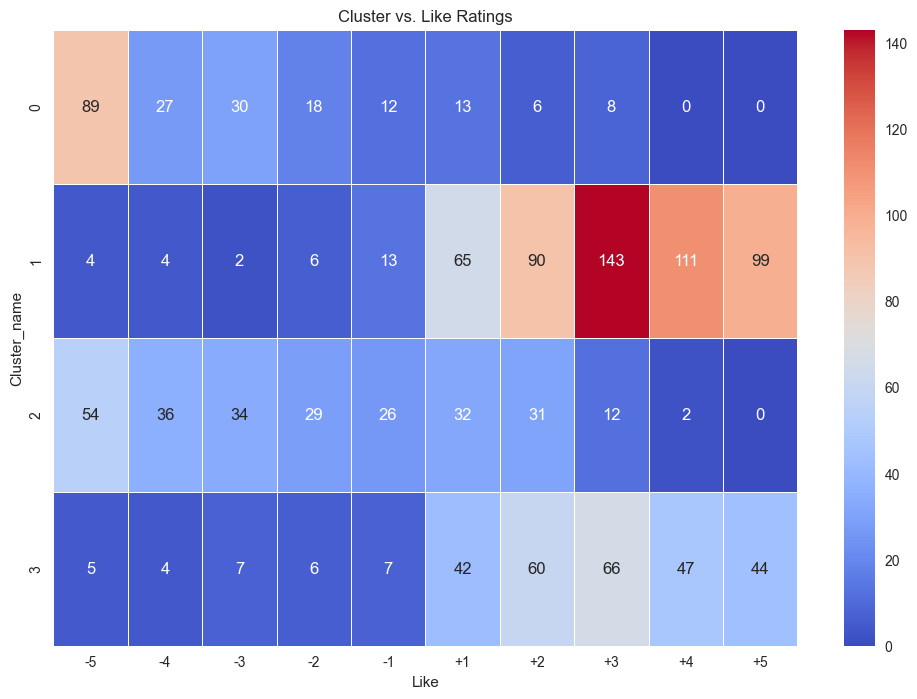

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt="d", linewidths=0.5)
plt.title("Cluster vs. Like Ratings")
plt.xlabel("Like")
plt.ylabel("Cluster_name")
plt.show()

In [29]:
crosstab_gender = pd.crosstab(df["Cluster_name"], df["Gender"])
crosstab_gender



Gender,Female,Male
Cluster_name,,
0,101,139
1,349,231
2,183,126
3,155,169


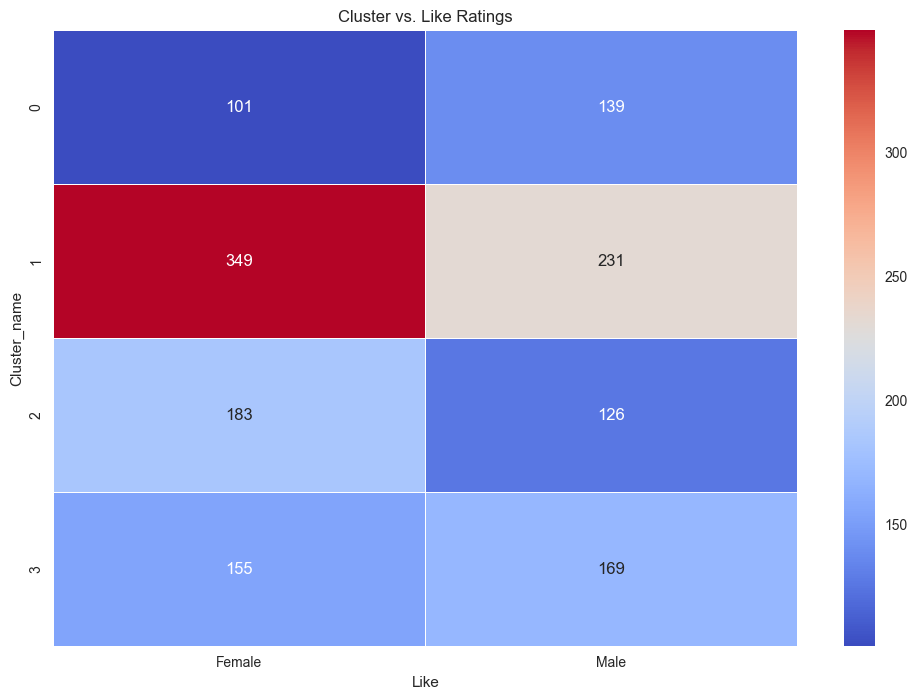

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_gender, cmap='coolwarm', annot=True, fmt="d", linewidths=0.5)
plt.title("Cluster vs. Like Ratings")
plt.xlabel("Like")
plt.ylabel("Cluster_name")
plt.show()

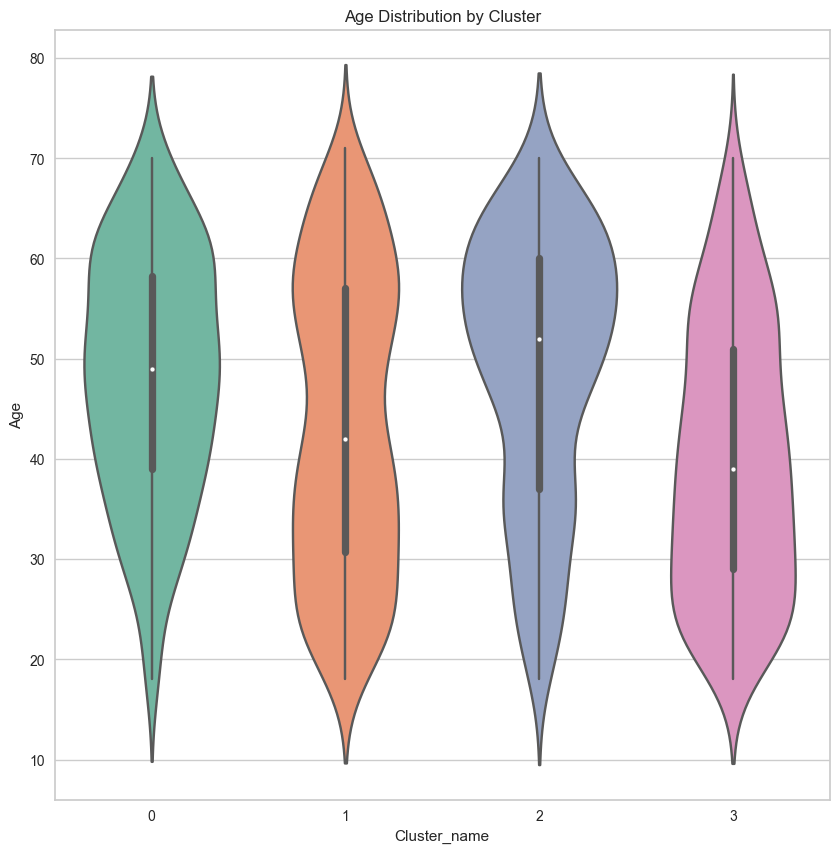

In [31]:
plt.figure(figsize=(10, 10))
sns.violinplot(data=df, x='Cluster_name', y='Age', palette='Set2')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster_name')
plt.ylabel('Age')
plt.show()

In [32]:
segments = df.iloc[:, 11:16]
segments.head()

,Like,Age,VisitFrequency,Gender,Cluster_name
0,-3,61,Every three months,Female,2
1,+2,51,Every three months,Female,3
2,+1,62,Every three months,Female,3
3,+4,69,Once a week,Female,1
4,+2,49,Once a month,Male,2


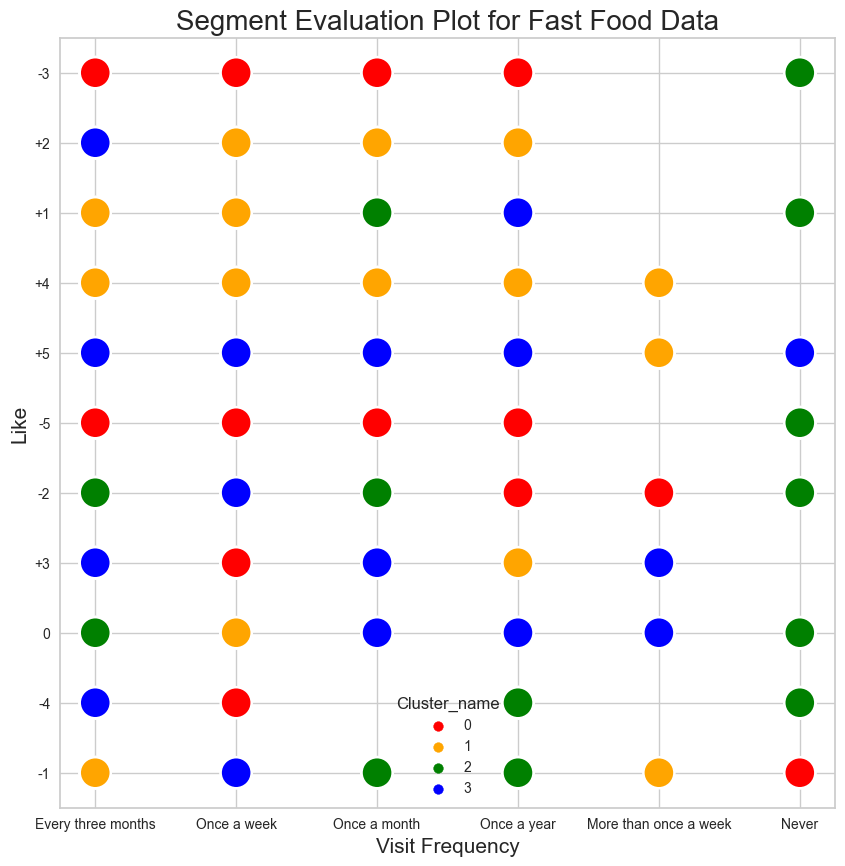

In [33]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="VisitFrequency",
    y="Like",
    data=segments,
    s=500,
    hue="Cluster_name",
    palette=["Red", "Orange", "Green", "Blue"]
)
plt.title("Segment Evaluation Plot for Fast Food Data", fontsize=20)
plt.xlabel("Visit Frequency", fontsize=15)
plt.ylabel("Like", fontsize=15)
plt.show()


In [36]:
jovian.commit(filename = "McD CaseStudy.ipynb")

<IPython.core.display.Javascript object>

TypeError: expected str, bytes or os.PathLike object, not list